# Read congressional data

In [1]:
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style

In [2]:
# Read SenatorCleaned.csv

df_senate = pd.read_csv('../Data/SenatorCleaned.csv')

In [3]:
df_senate

,Unnamed: 0,Name,Transaction.Date,Owner,Ticker,Asset.Name,Asset.Type,Type,Amount,Comment
0,1,Sheldon Whitehouse,11/25/2014,Self,M,"Macy's, Inc. (NYSE)",Stock,Purchase,1001.0,--
1,2,Sheldon Whitehouse,12/18/2014,Self,BEAV,B/E Aerospace Inc. (NASDAQ),Stock,Sale (Full),15001.0,--
2,3,Sheldon Whitehouse,12/18/2014,Self,KORS,Michael Kors Holdings Limited (NYSE),Stock,Sale (Partial),1001.0,--
3,4,Sheldon Whitehouse,12/18/2014,Self,T,"AT&T, Inc. (NYSE)",Stock,Purchase,1001.0,--
4,5,Sheldon Whitehouse,12/18/2014,Self,KEYS,"Keysight Technologies, Inc. (NYSE)",Stock,Sale (Full),1001.0,Agilent Tech common stock completed a spinoff ...
...,...,...,...,...,...,...,...,...,...,...
15661,15662,Lamar Alexander,5/31/2019,Spouse,--,Little Star Partnership\r\nCompany: Little Sta...,Other Securities,Purchase,100001.0,Little Star Partnership is a family Company ow...
15662,15663,Lamar Alexander,4/1/2016,Spouse,--,Montgomery County\r\nRate/Coupon: 5.00\r\nMatu...,Municipal Security,Sale (Full),15001.0,--
15663,15664,Lamar Alexander,9/6/2017,Spouse,--,Sevier County Tenn Pub Bldg\r\nRate/Coupon: 5....,Municipal Security,Purchase,50001.0,--
15664,15665,Lamar Alexander,9/7/2017,Spouse,--,Wilson County Tenn GO\r\nRate/Coupon: 5.00%\r\...,Municipal Security,Purchase,50001.0,--


In [4]:
df_senate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15666 entries, 0 to 15665
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15666 non-null  int64  
 1   Name              15666 non-null  object 
 2   Transaction.Date  15666 non-null  object 
 3   Owner             15666 non-null  object 
 4   Ticker            15666 non-null  object 
 5   Asset.Name        15666 non-null  object 
 6   Asset.Type        14250 non-null  object 
 7   Type              15666 non-null  object 
 8   Amount            15665 non-null  float64
 9   Comment           15666 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.2+ MB


In [5]:
# stock_prices_2023_to_now
df_stock_price = pd.read_csv('../Data/stock_prices_2023_to_now.csv')

In [6]:
df_stock_price

,Date,Ticker,Close
0,2023-01-03,AAGIY,45.799999
1,2023-01-03,AAP,151.539993
2,2023-01-03,AAPL,125.070000
3,2023-01-03,ABBV,162.380005
4,2023-01-03,ABNB,84.900002
...,...,...,...
187121,2024-07-17,X,38.139999
187122,2024-07-17,XNGSY,30.719999
187123,2024-07-17,XOM,117.639999
187124,2024-07-17,Z,52.720001


In [7]:
df_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187126 entries, 0 to 187125
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    187126 non-null  object 
 1   Ticker  187126 non-null  object 
 2   Close   187126 non-null  float64
dtypes: float64(1), object(2)
memory usage: 4.3+ MB


In [8]:
# congress-trading-all
#df_congress = pd.read_csv('../Data/congress-trading-all.csv', encoding="utf-16")

In [9]:
df_senate['Ticker'].unique()

array(['M', 'BEAV', 'KORS', ..., 'KERX', 'ETFC', 'ACUS'], dtype=object)

In [10]:
len(df_senate['Ticker'].unique())

1367

In [11]:
len(df_senate[df_senate['Ticker'] == 'KORS'])

11

In [12]:
df_senate[df_senate['Amount'].isnull()]

,Unnamed: 0,Name,Transaction.Date,Owner,Ticker,Asset.Name,Asset.Type,Type,Amount,Comment
4825,7181,James M Inhofe,10/5/2015,Self,WFM,WFM,Stock,Sale (Full),NaN,--


In [13]:
df_senate['Asset.Type'].unique()

array(['Stock', 'Corporate Bond', 'Non-Public Stock', 'Other Securities',
       'Municipal Security', 'Stock Option',
       'Commodities/Futures Contract', 'Cryptocurrency', nan, 'Bond'],
      dtype=object)

In [14]:
df_senate[df_senate['Asset.Type'] == 'Non-Public Stock']

,Unnamed: 0,Name,Transaction.Date,Owner,Ticker,Asset.Name,Asset.Type,Type,Amount,Comment
577,578,Mark R Warner,10/19/2018,Self,--,"Acumen Pharmaceutical, Inc.\r\nCompany: Acumen...",Non-Public Stock,Purchase,100001.0,--
584,585,Mark R Warner,9/7/2018,Self,--,"Snap + Style, Inc.\r\nCompany: Snap + Style, I...",Non-Public Stock,Purchase,50001.0,--
586,587,Mark R Warner,11/20/2020,Self,--,"Acumen Pharmaceuticals, Inc.\r\nCompany: Acume...",Non-Public Stock,Purchase,50001.0,--
589,590,Mark R Warner,6/16/2021,Self,--,"Acumen Pharmaceuticals, Inc.\r\nCompany: Acume...",Non-Public Stock,Purchase,15001.0,"As of 7/1/21, Acumen Pharmaceuticals, Inc. is ..."
596,597,Mark R Warner,12/19/2018,Self,--,"RideCharge, Inc.\r\nCompany: RideCharge, Inc. ...",Non-Public Stock,Sale (Full),250001.0,Underlying asset of Alexandria RC Investors LLC
...,...,...,...,...,...,...,...,...,...,...
12432,7670,Steve Daines,6/2/2017,Joint,--,"Bridger Technologies, Inc.",Non-Public Stock,Sale (Full),15001.0,--
12433,7671,Steve Daines,6/2/2017,Self,--,"Bridger Technologies, Inc.",Non-Public Stock,Sale (Full),15001.0,--
15619,15620,Lamar Alexander,12/15/2015,Spouse,--,Custom Foods of America Inc.\r\nCompany: Custo...,Non-Public Stock,Sale (Partial),250001.0,Sold to Lamar Alexander Family Trust
15621,15622,Lamar Alexander,12/15/2015,Self,--,Custom Foods of America Inc.\r\nCompany: Custo...,Non-Public Stock,Sale (Partial),250001.0,Sold to Leslee B Alexander Family Trust


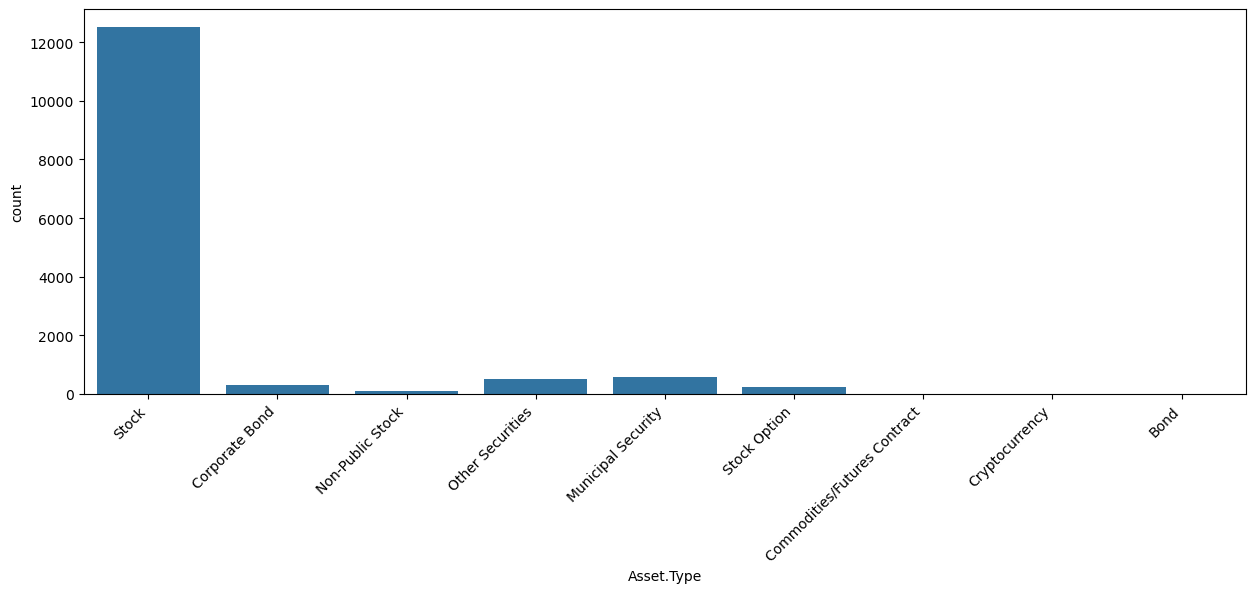

In [15]:
plt.figure(figsize = (15, 5))
sns.countplot(data=df_senate, x='Asset.Type')
plt.xticks(rotation=45, ha='right')  # Rotate labels if needed
plt.show()

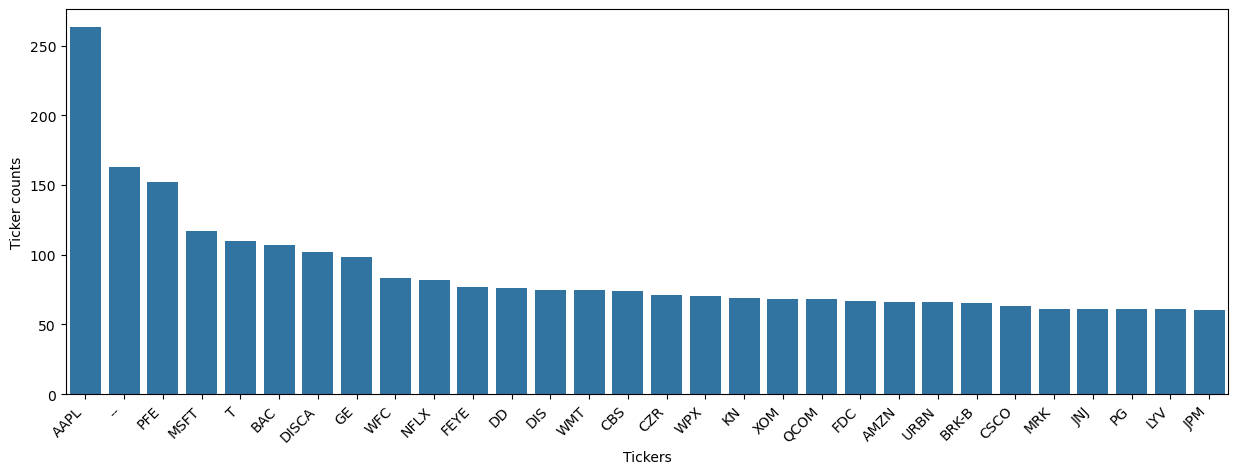

Ticker
AAPL     263
--       163
PFE      152
MSFT     117
T        110
BAC      107
DISCA    102
GE        98
WFC       83
NFLX      82
FEYE      77
DD        76
DIS       75
WMT       75
CBS       74
CZR       71
WPX       70
KN        69
XOM       68
QCOM      68
FDC       67
AMZN      66
URBN      66
BRK-B     65
CSCO      63
MRK       61
JNJ       61
PG        61
LYV       61
JPM       60
Name: count, dtype: int64

In [54]:
#df['asset_percentage'] = df_senate['Asset.Type'].value_counts(normalize=True, sort=False)

df_stock = df_senate[df_senate['Asset.Type'] == 'Stock'].copy()

category_counts = df_stock['Ticker'].value_counts()

plt.figure(figsize = (15, 5))
top_n_categories = category_counts.nlargest(30)
sns.countplot(data=df_stock, x='Ticker', order=top_n_categories.index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Tickers')
plt.ylabel('Ticker counts')
plt.show()

top_n_categories


In [34]:
df_senate[(df_senate['Ticker']=='--') & (df_senate['Asset.Type'] == 'Stock')]

,Unnamed: 0,Name,Transaction.Date,Owner,Ticker,Asset.Name,Asset.Type,Type,Amount,Comment
942,943,Patrick J Toomey,6/10/2014,Self,--,Team Capitol Bank,Stock,Exchange,500001.0,--
1105,1106,Patrick J Toomey,6/10/2014,Self,--,Team Capitol Bank,Stock,Exchange,500001.0,--
1248,3237,David A Perdue Jr,4/16/2020,Joint,--,C.S-CITI 1/1000TH S PERPTL,Stock,Sale (Full),1001.0,--
1810,3550,David A Perdue Jr,4/5/2019,Joint,--,First Data Corporation,Stock,Sale (Partial),1001.0,--
1878,3618,David A Perdue Jr,11/10/2015,Joint,--,Sigma-Aldrich Corp CMN,Stock,Sale (Full),1001.0,--
...,...,...,...,...,...,...,...,...,...,...
15176,14887,Thomas R Carper,2/13/2015,Spouse,--,Vanguard Consumer Discretionary ETF,Stock,Purchase,1001.0,--
15177,14888,Thomas R Carper,2/13/2015,Spouse,--,Vanguard Health Care TF,Stock,Purchase,1001.0,--
15188,14899,Thomas R Carper,2/12/2015,Spouse,--,SPDR S&P BRIC 40 Exchange,Stock,Sale (Full),1001.0,--
15194,14924,Thomas R Carper,6/24/2016,Spouse,--,Welltower Inc,Stock,Purchase,1001.0,--


In [35]:
df_senate[df_senate['Ticker']=='PFE']

,Unnamed: 0,Name,Transaction.Date,Owner,Ticker,Asset.Name,Asset.Type,Type,Amount,Comment
390,2656,David A Perdue Jr,11/2/2018,Joint,PFE,Pfizer Inc.,Stock,Sale (Partial),1001.0,--
398,2664,David A Perdue Jr,11/5/2018,Joint,PFE,Pfizer Inc.,Stock,Sale (Partial),15001.0,--
408,2674,David A Perdue Jr,11/8/2018,Joint,PFE,Pfizer Inc.,Stock,Sale (Partial),1001.0,--
409,2675,David A Perdue Jr,11/9/2018,Joint,PFE,Pfizer Inc.,Stock,Sale (Partial),1001.0,--
415,2681,David A Perdue Jr,11/12/2018,Joint,PFE,Pfizer Inc.,Stock,Sale (Partial),1001.0,--
...,...,...,...,...,...,...,...,...,...,...
15019,14573,Thomas R Carper,7/9/2020,Spouse,PFE,Pfizer Inc.,Stock,Purchase,1001.0,--
15061,14674,Thomas R Carper,11/9/2018,Spouse,PFE,Pfizer Inc,Stock,Sale (Full),1001.0,--
15063,14676,Thomas R Carper,11/9/2018,Spouse,PFE,Pfizer,Stock,Sale (Full),1001.0,--
15068,14697,Thomas R Carper,7/9/2020,Spouse,PFE,Pfizer Inc.,Stock,Purchase,1001.0,--


In [39]:
df_senate['Transaction.Date'] = pd.to_datetime(df_senate['Transaction.Date'])
df_senate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15666 entries, 0 to 15665
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        15666 non-null  int64         
 1   Name              15666 non-null  object        
 2   Transaction.Date  15666 non-null  datetime64[ns]
 3   Owner             15666 non-null  object        
 4   Ticker            15666 non-null  object        
 5   Asset.Name        15666 non-null  object        
 6   Asset.Type        14250 non-null  object        
 7   Type              15666 non-null  object        
 8   Amount            15665 non-null  float64       
 9   Comment           15666 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 1.2+ MB


In [41]:
import datetime

In [51]:
df_PFE_2020 = df_senate[(df_senate['Ticker']=='PFE') & (df_senate['Transaction.Date'] < pd.Timestamp(2020, 12, 31)) & (df_senate['Transaction.Date'] > pd.Timestamp(2020, 1, 1))].copy()

In [50]:
df_PFE_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 1618 to 15068
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        25 non-null     int64         
 1   Name              25 non-null     object        
 2   Transaction.Date  25 non-null     datetime64[ns]
 3   Owner             25 non-null     object        
 4   Ticker            25 non-null     object        
 5   Asset.Name        25 non-null     object        
 6   Asset.Type        25 non-null     object        
 7   Type              25 non-null     object        
 8   Amount            25 non-null     float64       
 9   Comment           25 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 2.1+ KB


In [47]:
df_PFE_2021 = df_senate[(df_senate['Ticker']=='PFE') & (df_senate['Transaction.Date'] < pd.Timestamp(2021, 12, 31)) & (df_senate['Transaction.Date'] > pd.Timestamp(2021, 1, 1))].copy()

In [49]:
df_PFE_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        0 non-null      int64         
 1   Name              0 non-null      object        
 2   Transaction.Date  0 non-null      datetime64[ns]
 3   Owner             0 non-null      object        
 4   Ticker            0 non-null      object        
 5   Asset.Name        0 non-null      object        
 6   Asset.Type        0 non-null      object        
 7   Type              0 non-null      object        
 8   Amount            0 non-null      float64       
 9   Comment           0 non-null      object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 0.0+ bytes


In [52]:
df_PFE_2022 = df_senate[(df_senate['Ticker']=='PFE') & (df_senate['Transaction.Date'] < pd.Timestamp(2022, 12, 31)) & (df_senate['Transaction.Date'] > pd.Timestamp(2022, 1, 1))].copy()

In [53]:
df_PFE_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        0 non-null      int64         
 1   Name              0 non-null      object        
 2   Transaction.Date  0 non-null      datetime64[ns]
 3   Owner             0 non-null      object        
 4   Ticker            0 non-null      object        
 5   Asset.Name        0 non-null      object        
 6   Asset.Type        0 non-null      object        
 7   Type              0 non-null      object        
 8   Amount            0 non-null      float64       
 9   Comment           0 non-null      object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 0.0+ bytes
